In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import pickle,keras
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow.keras import Sequential
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,mean_squared_error,matthews_corrcoef
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from matplotlib.lines import Line2D  
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [63]:
orignal_df=pd.read_csv('fraudTest.csv')
df=orignal_df[230000:260000]

del(df['Unnamed: 0'])

del_columns=['first','last','trans_num','unix_time','merch_lat','merch_long']
df.drop(del_columns,axis=1,inplace=True)

df.is_fraud.sum()

C:\Users\king_\AppData\Local\Temp\ipykernel_24060\3430002458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(del_columns,axis=1,inplace=True)


131

## Preprocessing

In [64]:
## The Following code replaces space with colon of the columns in the data frame

new_col=[]
for col in df.columns:
   x=col.replace(' ','_')
   new_col.append(x)
df.columns=new_col    

In [65]:
df['age'] = pd.DatetimeIndex(df['dob'])
df['age']=2022-df['age'].dt.year
df.drop('dob',axis=1,inplace=True)

C:\Users\king_\AppData\Local\Temp\ipykernel_24060\1334105606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.DatetimeIndex(df['dob'])
C:\Users\king_\AppData\Local\Temp\ipykernel_24060\1334105606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=2022-df['age'].dt.year
C:\Users\king_\AppData\Local\Temp\ipykernel_24060\1334105606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

In [66]:
# The following code removes the digits from street names

streets=df.street.unique()
new_street=[]
for street in streets:
    new_street.append(street.split(' ')[1]+'_'+street.split(' ')[2])
for s,new_s in zip(streets,new_street):
    df.street.replace(s,new_s,inplace=True)    

In [67]:
## The following code removes string FRAUD from the names of the merchants

merchants=df.merchant.unique()
new_merchants=[]
for mer in merchants:
    m=mer.split('_')[1]
    new_merchants.append(m)
for mer,new_mer in zip(merchants,new_merchants):
    df.merchant.replace(mer,new_mer,inplace=True)

In [68]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['Time_second']=np.nan
df['Time_second']=(df['trans_date_trans_time'].dt.second)

C:\Users\king_\AppData\Local\Temp\ipykernel_24060\1717594047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
C:\Users\king_\AppData\Local\Temp\ipykernel_24060\1717594047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_second']=np.nan
C:\Users\king_\AppData\Local\Temp\ipykernel_24060\1717594047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

## Exploratory Data Analysis

C:\Users\king_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


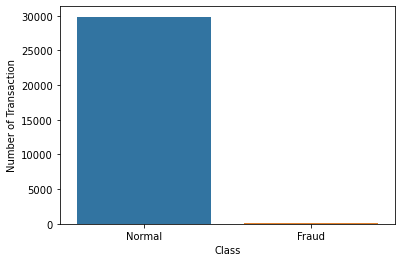

In [69]:
fraud_class=df.is_fraud.replace([0,1],['Normal','Fraud'])
sns.countplot(fraud_class)
plt.xlabel('Class')
plt.ylabel('Number of Transaction')
plt.show()

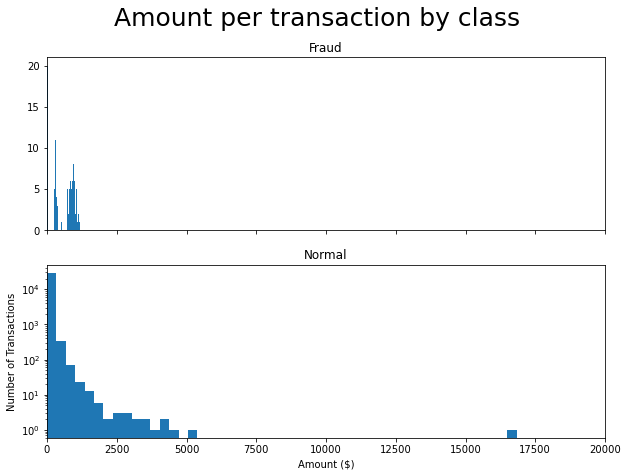

In [70]:
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,7),sharex=True)
f.suptitle('Amount per transaction by class',size=25)

bins = 50

ax1.hist(df[df.is_fraud==1].amt, bins = bins)
ax1.set_title('Fraud')

ax2.hist(df[df.is_fraud==0].amt, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

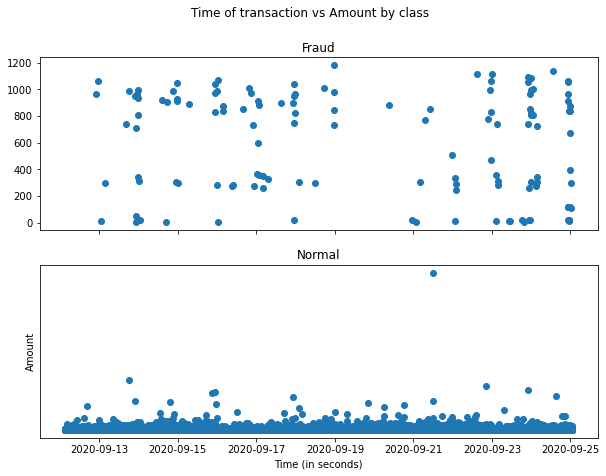

In [71]:
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,7) ,sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(list(df[df.is_fraud==1].trans_date_trans_time), list(df[df.is_fraud==1].amt))
ax1.set_title('Fraud')

ax2.scatter(list(df[df.is_fraud==0].trans_date_trans_time), list(df[df.is_fraud==0].amt))
ax2.set_title('Normal')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.yticks([])
plt.show()

del(df['trans_date_trans_time'])

## Clustering

In [72]:
## convert string categorical variables into numerical variables

def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df
df=Encoder(df)    

C:\Users\king_\AppData\Local\Temp\ipykernel_24060\2605487496.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature])


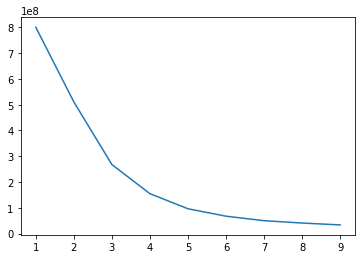

In [73]:
## Selecting two feature to perform clustering

cluster_Feature=df[['amt','Time_second']]

# Determing the Number of clusters using elbow method

score_1 = []
range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(cluster_Feature)
    score_1.append(kmeans.inertia_)
    
plt.plot(range_values,score_1)    

In [74]:
## Clustering with KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(cluster_Feature)
labels_kmeans = kmeans.labels_

# plt.figure(figsize=(8,5))
# sns.scatterplot(data=df,y='amt',x='Time_second',hue=labels_kmeans,palette='viridis')
# plt.show()

In [75]:
# ## Clustering with KMediod

# kmediods = KMedoids(n_clusters=3, random_state=42).fit(cluster_Feature)
# labels_kmediods = kmediods.labels_

# # plt.figure(figsize=(8,5))
# # sns.scatterplot(data=df,y='amt',x='Time_second',hue=labels_kmediods,palette='viridis')
# # plt.show()

In [76]:
# ## DBSCAN Clustering

# dbscan=DBSCAN(eps=0.20, min_samples=3).fit(cluster_Feature)
# dbscan_label=dbscan.labels_

# # sns.scatterplot(data=df,y='amt',x='Time_second',hue=dbscan_label,palette='viridis')

In [77]:
# ## GNN Clustering

# gnn = GaussianMixture(n_components=3)
# gnn_labels=gnn.fit(cluster_Feature).predict(cluster_Feature)
# # sns.scatterplot(data=df,y='amt',x='Time_second',hue=gnn_labels,palette='viridis')

In [78]:
# kmeans_score = silhouette_score(cluster_Feature, labels_kmeans, metric='euclidean')
# dbscan_score = silhouette_score(cluster_Feature, dbscan_label, metric='euclidean')
# gmm_score = silhouette_score(cluster_Feature, gnn_labels, metric='euclidean')
# kmediods_score = silhouette_score(cluster_Feature, labels_kmediods, metric='euclidean')
# # print('Silhouetter Score: %.3f' % score)

In [79]:
# scores={'KMEANS':kmeans_score,'DBSCAN':dbscan_score,'GMM':gmm_score,'KMediod':kmediods_score}
# pd.DataFrame(scores,index=['silhouette_score'])

In [80]:
# plt.figure(figsize=(15,12))
# plt.subplot(2,2,1)
# sns.scatterplot(data=df,y='amt',x='Time_second',hue=labels_kmeans,palette='viridis')
# plt.title(f'KMeans Silhouette_Score:{np.round(kmeans_score,2)}')
# plt.subplot(2,2,2)
# sns.scatterplot(data=df,y='amt',x='Time_second',hue=labels_kmediods,palette='viridis')
# plt.title(f'KMedios Silhouette_Score:{np.round(kmediods_score,2)}')
# plt.subplot(2,2,3)
# sns.scatterplot(data=df,y='amt',x='Time_second',hue=dbscan_label,palette='viridis')
# plt.title(f'DBSCAN Silhouette_Score:{np.round(dbscan_score,2)}')
# plt.subplot(2,2,4)
# sns.scatterplot(data=df,y='amt',x='Time_second',hue=gnn_labels,palette='viridis')
# plt.title(f'GMM Silhouette_Score:{np.round(gmm_score,2)}')
# plt.show()

In [81]:
df['Cluster_by_amount']=labels_kmeans
df.drop(['amt'],axis=1,inplace=True)

C:\Users\king_\AppData\Local\Temp\ipykernel_24060\3689800827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_by_amount']=labels_kmeans
C:\Users\king_\AppData\Local\Temp\ipykernel_24060\3689800827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['amt'],axis=1,inplace=True)


## Feature Extraction

In [82]:
# from sklearn.ensemble import ExtraTreesClassifier

X=df.drop(['is_fraud','Time_second'],axis=1)
y=df.is_fraud


# # plt.figure(figsize=(15,10))
# # model = ExtraTreesClassifier()
# # model.fit(X,y)
# # # print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# # #plot graph of feature importances for better visualization
# # feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# # best_features=[ind for ind in (pd.DataFrame(feat_importances.nlargest())).index]
# # feat_importances.nlargest(20).plot(kind='barh')
# # plt.show()

# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split
# # If p-value < 0.05 -->Significant
# # If p-value > 0.05 -->Not Significant
# X_train,X_test, Y_train, Y_test = train_test_split(X, y, test_size = .2, random_state = 10)
# x_incl_cons = sm.add_constant(X_train)
# model = sm.OLS(Y_train, x_incl_cons)  #ordinary least square
# results = model.fit()  #regresssion results
# # results.params
# # results.pvalues
# corr=pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})
# corr=corr[corr.pvalue<=0.05].iloc[1:]
# corr

# df=df[corr.index]
# df['is_fraud']=y

## AutoEncoder

In [83]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
X_train = X_train[X_train.is_fraud == 0]
X_train = X_train.drop(['is_fraud'], axis=1)
y_test = X_test['is_fraud']
X_test = X_test.drop(['is_fraud'], axis=1)

scaler = StandardScaler()
X_train=scaler.fit(X_train).transform(X_train)
X_test=scaler.fit(X_test).transform(X_test)

In [84]:
# # Neural Network Using RandomSearchCV

# from sklearn.model_selection import RandomizedSearchCV


# # Function to Create model
# def NN_model(neurons1= 1, neurons2= 1, optimizer='Adam',activation1='relu',activation2='tanh',activation3='tanh',learning_rate=0.1):
#    input_layer = Input(shape=(input_dim,))
#    encoder = Sequential(name='encoder')
#    encoder = Dense(neurons1, activation=activation1, 
#                 activity_regularizer=regularizers.l1(learning_rate))(input_layer)
#    encoder = Dense(neurons2, activation=activation2)(encoder)
#    encoder = Dense(neurons2, activation=activation3)(encoder) 
   
#    decoder = Sequential(name='decoder') 
#    decoder = Dense(int(neurons2), activation=activation1)(encoder)
#    encoder = Dense(neurons2, activation=activation2)(encoder) 
#    decoder = Dense(neurons2, activation=activation3)(encoder)

#    autoencoder = Model(inputs=input_layer, outputs=decoder)
   
#    autoencoder.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['accuracy'])

#    return autoencoder

# # Create model
# model = KerasClassifier(build_fn=NN_model,epochs=10,verbose=0)

# # Define Grid search parameters
# batch_size = [64]
# neurons1 = [120]
# neurons2 = [60]
# learning_rate = [0.00005]
# activation1 = ['relu', 'tanh','softmax','sigmoid']
# activation2 = ['relu', 'tanh','softmax','sigmoid']
# activation3 = ['relu', 'tanh','softmax','sigmoid']
# optimizer = ['Adam']


# param_grid = dict(neurons1=neurons1, neurons2=neurons2, 
#                   learning_rate=learning_rate,
#                   activation1=activation1,activation2=activation2,activation3=activation3,
#                  optimizer=optimizer,
#                  batch_size = batch_size)

# grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=1, cv=5)

# grid_result = grid.fit(X_test,y_test)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))    

In [85]:
neurons1=120
neurons2=30
learning_rate=0.00005
activation1='relu'
activation2='tanh'

input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Sequential(name='encoder')
encoder = Dense(neurons1, activation=activation1, 
                activity_regularizer=regularizers.l1(0.00005))(input_layer)
encoder = Dense(neurons2, activation=activation2)(encoder)

decoder = Sequential(name='decoder')
decoder = Dense(neurons1, activation=activation1)(encoder)
decoder = Dense(neurons2, activation=activation2)(encoder)
decoder = Dense(input_dim, activation=activation2)(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [86]:
nb_epoch = 10
batch_size = 64
autoencoder.compile(optimizer='Adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/10
374/374 [==============================] - 3s 5ms/step - loss: 0.3430 - accuracy: 0.5954 - val_loss: 0.2332 - val_accuracy: 0.7128
Epoch 2/10
374/374 [==============================] - 2s 5ms/step - loss: 0.2272 - accuracy: 0.7102 - val_loss: 0.2190 - val_accuracy: 0.7168
Epoch 3/10
374/374 [==============================] - 1s 3ms/step - loss: 0.2180 - accuracy: 0.7002 - val_loss: 0.2130 - val_accuracy: 0.7012
Epoch 4/10
374/374 [==============================] - 1s 4ms/step - loss: 0.2138 - accuracy: 0.6886 - val_loss: 0.2100 - val_accuracy: 0.6853
Epoch 5/10
374/374 [==============================] - 1s 4ms/step - loss: 0.2114 - accuracy: 0.6748 - val_loss: 0.2081 - val_accuracy: 0.6682
Epoch 6/10
374/374 [==============================] - 1s 4ms/step - loss: 0.2097 - accuracy: 0.6607 - val_loss: 0.2066 - val_accuracy: 0.6647
Epoch 7/10
374/374 [==============================] - 1s 4ms/step - loss: 0.2085 - accuracy: 0.6498 - val_loss: 0.2054 - val_accuracy: 0.6550
Epoch 

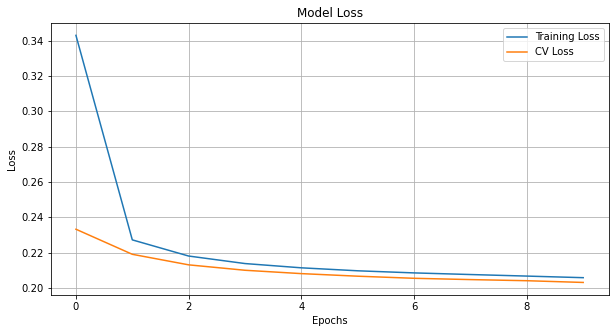

In [87]:
autoencoder = load_model('model.h5')

plt.figure(figsize = (10,5))
plt.plot(history['loss'], label = 'Training Loss')
plt.plot(history['val_loss'], label = 'CV Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [88]:
predictions = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'Anomaly':y_test})
error_df['Index']=[i for i in range(len(error_df))]

error_df.groupby(['Anomaly']).describe()

188/188 [==============================] - 0s 2ms/step


reconstruction_error                                          \
                       count      mean       std       min       25%   
Anomaly                                                                
0                     5980.0  0.192767  0.529697  0.002676  0.040697   
1                       20.0  3.072480  1.564258  0.013904  3.785414   

                                        Index                                  \
              50%       75%       max   count         mean          std   min   
Anomaly                                                                         
0        0.067369  0.141502  7.852597  5980.0  3001.697993  1730.994221   0.0   
1        3.820704  3.851490  3.922210    20.0  2342.300000  2002.755683  94.0   

                                           
             25%     50%      75%     max  
Anomaly                                    
0        1504.75  3003.5  4500.25  5999.0  
1         721.50  1661.5  4224.25  5680.0

C:\Users\king_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\king_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


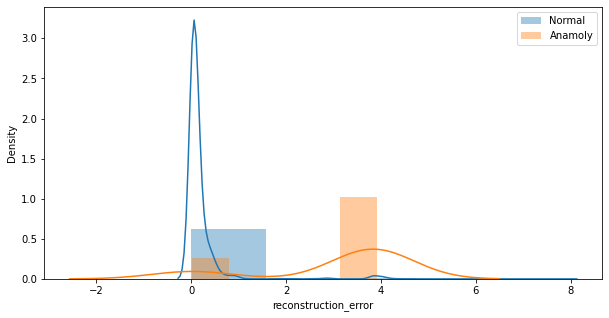

In [89]:
plt.figure(figsize = (10,5))
sns.distplot(error_df[error_df['Anomaly']==0]['reconstruction_error'], bins = 5, label = 'Normal')
sns.distplot(error_df[error_df['Anomaly']==1]['reconstruction_error'], bins=5, label = 'Anamoly')
plt.legend()
plt.show()

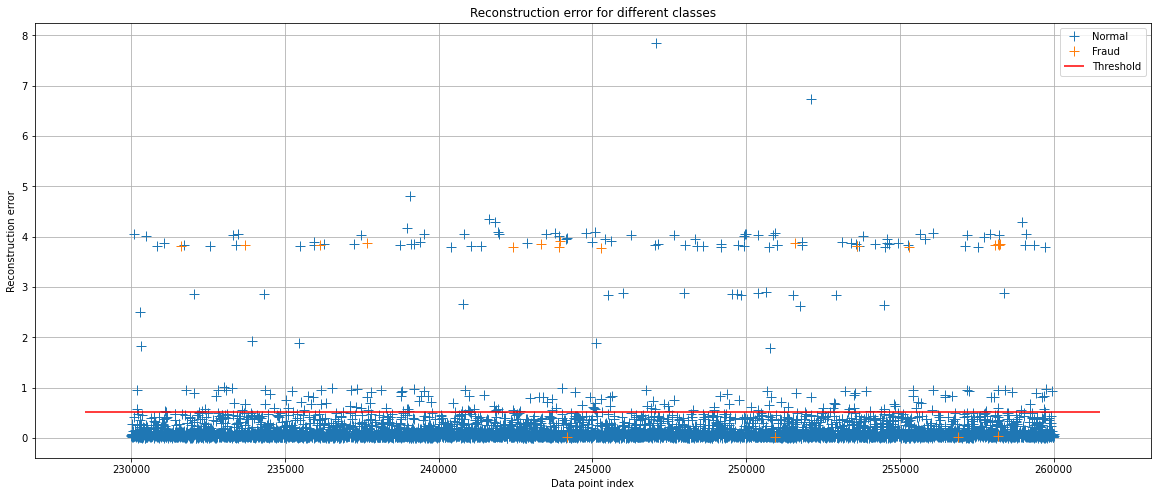

In [90]:
threshold = np.percentile(mse, 95)

groups = error_df.groupby('Anomaly')
fig, ax = plt.subplots(figsize = (20,8))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='+', ms=10, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.grid()
# plt.show();

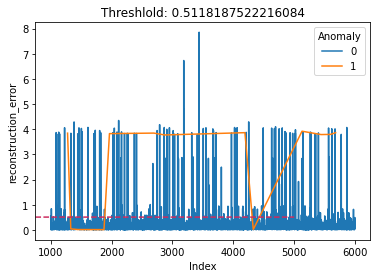

In [93]:
s=1000
n=20000
plot=sns.lineplot(x=error_df[s:n].Index, y=error_df[s:n].reconstruction_error, hue=error_df[s:n].Anomaly)

line = Line2D(xdata=np.arange(0, len(error_df[s:n])),ydata=np.full(len(error_df[s:n]), threshold),color='#CC2B5E',linewidth=1.5,linestyle='dashed')

plot.add_artist(line)
plt.title('Threshlold: {threshold}'.format(threshold=threshold))
plt.show()

In [94]:
LABELS = ['Normal', 'Fraud']
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(error_df.Anomaly, y_pred),
                  index=["Actual Non-Fraud", "Actual Fraud"],
                  columns=["Predicted Non-Fraud", "Predicted Fraud"])
cm

,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,5696,284
Actual Fraud,4,16


In [95]:
au_roc=roc_auc_score(error_df.Anomaly,y_pred)
ae_prec,ae_recall,ae_f1_score,ae_mathews=precision_score(error_df.Anomaly,y_pred),recall_score(error_df.Anomaly,y_pred),f1_score(error_df.Anomaly,y_pred),matthews_corrcoef(error_df.Anomaly,y_pred)

### Autoencoder

In [96]:
scaler = StandardScaler()
X=df.drop('is_fraud',axis=1)
X=scaler.fit(X).transform(X)
y_test=df.is_fraud

predictions = autoencoder.predict(X)

mse = np.mean(np.power(X - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'Anomaly':y_test})

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

df['Anomaly']=y_pred

938/938 [==============================] - 2s 2ms/step


C:\Users\king_\AppData\Local\Temp\ipykernel_24060\410695967.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anomaly']=y_pred


### Auto Encoder and Random Forest

In [97]:
X=df.drop('is_fraud',axis=1)
X=scaler.fit(X).transform(X)
y=df.is_fraud

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)

os = SMOTE(random_state=0)
X_resample,y_resample=os.fit_resample(X_train,y_train.values.ravel())

aurf=RandomForestClassifier()
aurf=aurf.fit(X_train,y_train)

# Confusion Matrix

# Predicting using above model
y_pred = aurf.predict(X_test)


# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred.round(), labels=[0, 1]),
                  index=["Actual Non-Fraud", "Actual Fraud"],
                  columns=["Predicted Non-Fraud", "Predicted Fraud"])
cm

,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,8953,8
Actual Fraud,12,27


In [98]:
probs = [0 for _ in range(len(y_test))]
probs=np.array(probs)

base_probs=aurf.predict(X_test).round()
auc=roc_auc_score(y_test,probs)
base_auc=roc_auc_score(y_test,base_probs)
probs_fpr,probs_tpr,_=roc_curve(y_test,probs)
base_fpr,base_tpr,_=roc_curve(y_test,base_probs)
base_prec, base_recall, thresholds = precision_recall_curve(y_test, base_probs)
base_auc_pr = metrics.auc(base_recall, base_prec)

aerf_prec,aerf_recall,aerf_f1_score,aerf_mathews=precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred),matthews_corrcoef(y_test,y_pred)

### Random Forest

In [99]:
X=df.drop(['is_fraud','Anomaly'],axis=1)
X=scaler.fit(X).transform(X)
y=df.is_fraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)

os = SMOTE(random_state=0)
X_train,y_train=os.fit_resample(X_train,y_train.values.ravel())

rf=RandomForestClassifier()
rf=rf.fit(X_train,y_train)

# Predicting using above model
y_pred = rf.predict(X_test)


# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred.round(), labels=[0, 1]),
                  index=["Actual Non-Fraud", "Actual Fraud"],
                  columns=["Predicted Non-Fraud", "Predicted Fraud"])
cm

,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,8936,25
Actual Fraud,9,30


In [100]:
rf_prec,rf_recall,rf_f1_score,rf_mathews=precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred),matthews_corrcoef(y_test,y_pred)

## Decision Tree

In [101]:
X=df.drop(['is_fraud','Anomaly'],axis=1)
X=scaler.fit(X).transform(X)
y=df.is_fraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)

os = SMOTE(random_state=0)
X_train,y_train=os.fit_resample(X_train,y_train.values.ravel())

dt=DecisionTreeClassifier()
dt=dt.fit(X_train,y_train)

# Predicting using above model
y_pred = dt.predict(X_test)


# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred.round(), labels=[0, 1]),
                  index=["Actual Non-Fraud", "Actual Fraud"],
                  columns=["Predicted Non-Fraud", "Predicted Fraud"])
cm

,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,8932,29
Actual Fraud,10,29


In [102]:
dt_prec,dt_recall,dt_f1_score,dt_mathews=precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred),matthews_corrcoef(y_test,y_pred)

## SVM

In [103]:
X=df.drop(['is_fraud','Anomaly'],axis=1)
X=scaler.fit(X).transform(X)
y=df.is_fraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)

os = SMOTE(random_state=0)
X_train,y_train=os.fit_resample(X_train,y_train.values.ravel())

svc=SVC()
svc=svc.fit(X_train,y_train)

# Predicting using above model
y_pred = svc.predict(X_test)


# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred.round(), labels=[0, 1]),
                  index=["Actual Non-Fraud", "Actual Fraud"],
                  columns=["Predicted Non-Fraud", "Predicted Fraud"])
cm

,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,8754,207
Actual Fraud,8,31


In [104]:
svc_prec,svc_recall,svc_f1_score,svc_mathews=precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred),matthews_corrcoef(y_test,y_pred)

## KNN

In [105]:
X=df.drop(['is_fraud','Anomaly'],axis=1)
X=scaler.fit(X).transform(X)
y=df.is_fraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)

os = SMOTE(random_state=0)
X_train,y_train=os.fit_resample(X_train,y_train.values.ravel())

knn = KNeighborsClassifier(n_neighbors=1)
knn=knn.fit(X_train,y_train)

# Predicting using above model
y_pred = knn.predict(X_test)


# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred.round(), labels=[0, 1]),
                  index=["Actual Non-Fraud", "Actual Fraud"],
                  columns=["Predicted Non-Fraud", "Predicted Fraud"])
cm

,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,8909,52
Actual Fraud,12,27


In [106]:
knn_prec,knn_recall,knn_f1_score,knn_mathews=precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred),matthews_corrcoef(y_test,y_pred)

### Comparisons

In [108]:
data={'Proposed Model':{'Precision':aerf_prec*100,
                       'Recall':aerf_recall*100,
                       'F-1 Score':aerf_f1_score*100,
                                'Mathew Correaltion':aerf_mathews*100},'AutoEncoder':{'Precision':ae_prec*100,
                       'Recall':ae_recall*100,
                       'F-1 Score':ae_f1_score,
                    'Mathew Correaltion':ae_mathews*100},
      'Random_Forest':{'Precision':rf_prec*100,
                       'Recall':rf_recall*100,
                       'F-1 Score':rf_f1_score*100,
                      'Mathew Correaltion':rf_mathews*100},
     'DecisionTree':{'Precision':dt_prec*100,
                       'Recall':dt_recall*100,
                       'F-1 Score':dt_f1_score*100,
                      'Mathew Correaltion':dt_mathews*100},
     'SVM':{'Precision':svc_prec*100,
                       'Recall':svc_recall*100,
                       'F-1 Score':svc_f1_score*100,
                      'Mathew Correaltion':svc_mathews*100},
     'KNN':{'Precision':knn_prec*100,
                       'Recall':knn_recall*100,
                       'F-1 Score':knn_f1_score*100,
                      'Mathew Correaltion':knn_mathews*100}}
df=pd.DataFrame(data=data)
df.replace(np.nan,0,inplace=True)
df

,Proposed Model,AutoEncoder,Random_Forest,DecisionTree,SVM,KNN
Precision,77.142857,5.333333,54.545455,50.000000,13.025210,34.177215
Recall,69.230769,80.000000,76.923077,74.358974,79.487179,69.230769
F-1 Score,72.972973,0.100000,63.829787,59.793814,22.382671,45.762712
Mathew Correaltion,72.969291,19.901182,64.597796,60.774073,31.594340,48.343021


### References

1) Valkov, V. (2019). Credit Card Fraud Detection using Autoencoders in Keras — TensorFlow for Hackers (Part VII). [online] Medium. Available at: https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd.

2) Gökden, B. (2020). Applying Anomaly Detection with Autoencoders to Fraud Detection. [online] Medium. Available at: https://towardsdatascience.com/applying-anomaly-detection-with-autoencoders-to-fraud-detection-feaaee6b5b09 [Accessed 19 Aug. 2022].

3) Brownlee, J. (2016). How to Grid Search Hyperparameters for Deep Learning Models in Python With Keras. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/.